In [1]:
#!/usr/bin/env python
# coding: utf-8


#import modules for scikit learn, data frame viewing, etc. 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

























In [2]:

#reads in csv file, data extracted using Scott's scraper
dataset = pd.read_csv('ff_data2019.csv')
#prints description for our data set
pd.set_option('display.max_columns', 40)
dataset.describe()



,l_gp,l_points,l_owners,l_project,l_actual,l_passyds,l_passtd,l_passint,l_rushyds,l_rushtd,l_rush1st,l_recepts,l_recyds,l_rectd,l_rec1st,l_fumble,QB?,RB?,WR?,TE?,I_passydpg,I_passtdpg,I_passintpg,I_rushydpg,I_rushtdpg,l_rush1stpg,l_receptspg,l_recydspg,l_rectdpg,l_rec1stpg
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,4.504615,48.585692,0.395815,207.538462,199.046154,122.763077,0.738462,0.356923,53.375385,0.424615,2.855385,10.596923,121.778462,0.741538,5.716923,0.289231,0.120000,0.267692,0.427692,0.184615,28.197692,0.164205,0.083026,11.563128,0.092462,0.620359,2.322308,26.733641,0.168103,1.257282
std,0.925034,33.725980,0.403750,130.033101,117.104737,367.819630,2.358835,1.220449,105.010291,1.079270,5.503143,9.471562,121.628305,1.094725,5.905103,0.654548,0.325463,0.443439,0.495507,0.388584,79.770092,0.502336,0.271995,22.010239,0.240128,1.147708,1.952554,25.473625,0.249092,1.244974
min,1.000000,9.670000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.600000,0.000000,0.000000,0.000000,-1.400000,0.000000,0.000000
25%,4.000000,20.000000,0.010000,87.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.250000,0.000000,0.200000
50%,5.000000,39.000000,0.190000,206.000000,202.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,8.000000,83.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.800000,18.500000,0.000000,0.800000
75%,5.000000,70.670000,0.860000,318.000000,305.000000,0.000000,0.000000,0.000000,52.000000,0.000000,3.000000,15.000000,172.000000,1.000000,8.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.600000,3.600000,41.500000,0.250000,1.800000
max,6.000000,178.300000,1.000000,482.000000,388.000000,1831.000000,12.000000,8.000000,587.000000,8.000000,31.000000,45.000000,543.000000,6.000000,30.000000,4.000000,1.000000,1.000000,1.000000,1.000000,366.200000,2.400000,1.600000,117.400000,2.000000,6.200000,9.000000,113.000000,1.200000,6.000000


,l_points,Value
0,mean,48.5857
1,median,39
2,mode,[11.27]


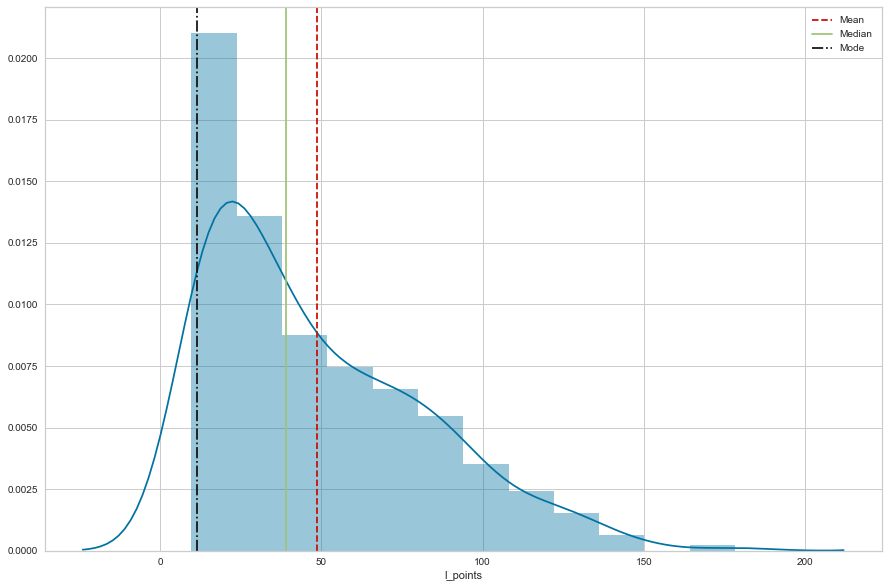

In [17]:
#describes values chosen 
vals = ["l_project", "l_actual", "I_passydpg","I_passtdpg","I_passintpg","I_rushydpg","I_rushtdpg","l_rush1stpg","l_receptspg","l_recydspg","l_rectdpg", "l_rec1stpg", "QB?","RB?","WR?","TE?"]
 
#predictors
X = dataset[vals].values

#target variable
y = dataset['l_points'].values

#Plot creation
plt.figure(figsize=(15,10))
plt.tight_layout()

seabornInstance.distplot(dataset['l_points'])
mean=dataset['l_points'].mean()
median=dataset['l_points'].median()
mode=dataset['l_points'].mode().array
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='k', linestyle='-.')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

mmm = pd.DataFrame({'l_points': ['mean', 'median', 'mode'], 'Value': [mean, median, mode]})
display(mmm)

In [4]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


#summary Statistics Prior to Lasso
print(OLS(y_train,X_train).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     305.6
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          4.36e-162
Time:                        22:06:00   Log-Likelihood:                -1024.8
No. Observations:                 292   AIC:                             2082.
Df Residuals:                     276   BIC:                             2140.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0006      0.008     -0.076      0.9

/Users/kushgulati/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


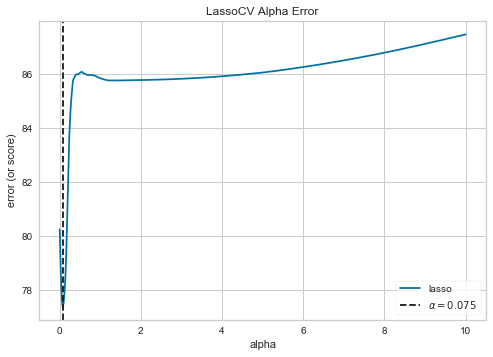

In [5]:
from sklearn.linear_model import LassoCV
import numpy as np
from yellowbrick.regressor import AlphaSelection



# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [25]:
#Prints Lasso Actual vs Predicted in Tabular Format 

print("Lasso Predict with transformations:")
clf = linear_model.Lasso(alpha = .075)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


coefs = pd.DataFrame(clf.coef_, vals)
display(coefs)


print("Intercept: " + str(clf.intercept_))





Lasso Predict with transformations:


,0
l_project,0.000707
l_actual,-0.175723
I_passydpg,0.073355
I_passtdpg,9.137788
I_passintpg,-2.436385
I_rushydpg,0.344200
I_rushtdpg,9.660258
l_rush1stpg,-0.411748
l_receptspg,1.348601
l_recydspg,0.133528


Intercept: 64.36278882495697


In [7]:
dfLasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

with pd.option_context("display.max_rows", 100):
    display(dfLasso)

,Actual,Predicted
0,17.47,15.062809
1,79.08,82.000338
2,117.79,106.070956
3,78.73,77.404755
4,16.07,12.922567
5,21.00,20.545287
6,48.88,53.303082
7,16.00,13.003900
8,80.67,80.155172
9,79.53,86.095030


Lasso Graph


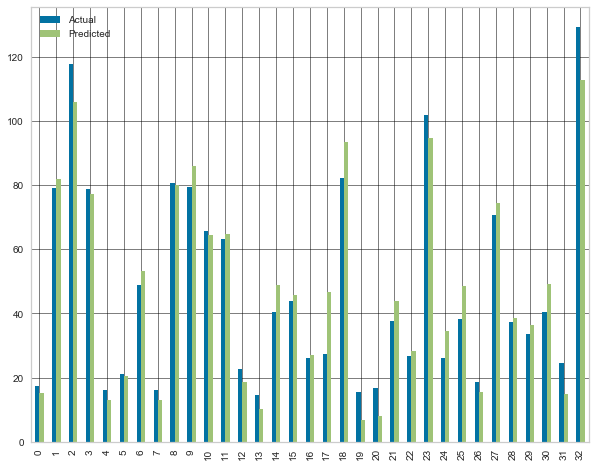

In [8]:
print("Lasso Graph")
dfLasso.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 5.6789440798216155
Mean Squared Error: 53.18886992964699
Root Mean Squared Error: 7.293069993469622
